Step 1: Prepare the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('gpa.csv')

In [3]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
good_standing = df[df['GPA']>=3.00].index
bad_standing = df[df['GPA']<3.00].index

In [5]:
df.loc[good_standing,'Standing']="1"
df.loc[bad_standing,'Standing']="0"

In [6]:
df.head(9)

,SAT,GPA,Standing
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
5,1670,2.91,0
6,1764,3.00,1
7,1764,3.00,1
8,1792,3.01,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
SAT         84 non-null int64
GPA         84 non-null float64
Standing    84 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [8]:
df.shape

(84, 3)

In [9]:
# Checking for missing values in the Standing Column
df.Standing.isnull().sum()

0

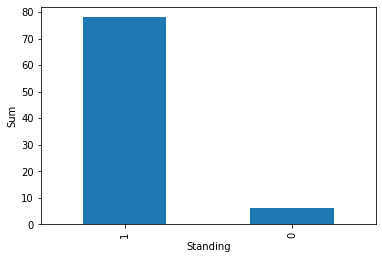

In [10]:
df['Standing'].value_counts().plot.bar()
plt.xlabel('Standing')
plt.ylabel('Sum')
plt.show()

In [11]:
df.to_csv('NewGPA.csv')

In [12]:
df2 = pd.read_csv('NewGPA.csv')

In [13]:
df2.head()

,Unnamed: 0,SAT,GPA,Standing
0,0,1714,2.40,0
1,1,1664,2.52,0
2,2,1760,2.54,0
3,3,1685,2.74,0
4,4,1693,2.83,0


In [14]:
df2.drop(["Unnamed: 0"], axis = 1, inplace = True) 

In [15]:
df2.head(9)

,SAT,GPA,Standing
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
5,1670,2.91,0
6,1764,3.00,1
7,1764,3.00,1
8,1792,3.01,1


In [16]:
df2

,SAT,GPA,Standing
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,1
82,1962,3.76,1


Step 2: Feature engineering

In [17]:
columns = ['SAT', 'GPA']

In [18]:
features = df[list(columns)].values

In [19]:
labels = df2['Standing'].values

Step 3: Building the model

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [21]:
clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X_train, y_train)

Step 4: Testing the accuracy of the model

In [22]:
accuracy = clf.score(X_train, y_train)

In [23]:
print(accuracy * 100)

100.0


Step 5: Predict new outcome

In [24]:
SAT_GPA_new = [[2050,3.9]]
Standing_predict = clf.predict(SAT_GPA_new)

In [25]:
print(Standing_predict)

[1]
